In [1]:
# Enable interactive plot
# %matplotlib notebook
# Enable interactive plot (Visual Studio Code)
%matplotlib ipympl

# Enable animation in Spyder 
# %matplotlib qt
# %matplotlib gt5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('ggplot')

plt.ioff()


In [3]:

# ############################################################
# Creación de datos
x = np.linspace(-3, 3, 91)
y = np.linspace(-3, 3, 91)

t = np.linspace(0, 25, 30)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])

G = (X3**2 + Y3**2)*sinT3
# Graficar una flecha cada step puntos
step = 10
x_q, y_q = x[::step], y[::step]
 
# Create U and V vectors to plot
U = G[::step, ::step, :-1].copy()
V = np.roll(U, shift=3, axis=2)

# ############################################################


In [4]:
help(np.roll)

Help on function roll in module numpy:

roll(a, shift, axis=None)
    Roll array elements along a given axis.
    
    Elements that roll beyond the last position are re-introduced at
    the first.
    
    Parameters
    ----------
    a : array_like
        Input array.
    shift : int or tuple of ints
        The number of places by which elements are shifted.  If a tuple,
        then `axis` must be a tuple of the same size, and each of the
        given axes is shifted by the corresponding number.  If an int
        while `axis` is a tuple of ints, then the same value is used for
        all given axes.
    axis : int or tuple of ints, optional
        Axis or axes along which elements are shifted.  By default, the
        array is flattened before shifting, after which the original
        shape is restored.
    
    Returns
    -------
    res : ndarray
        Output array, with the same shape as `a`.
    
    See Also
    --------
    rollaxis : Roll the specified axis backwa

In [5]:
x = np.arange(10)
np.roll(x,2)

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

In [6]:
x2 = np.reshape(x, (2,5))
print(x2)
print(np.roll(x2,1))
print(np.roll(x2,1,axis=0))
print(np.roll(x2,2,axis=0))
print(np.roll(x2,1,axis=1))

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[9 0 1 2 3]
 [4 5 6 7 8]]
[[5 6 7 8 9]
 [0 1 2 3 4]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[4 0 1 2 3]
 [9 5 6 7 8]]


In [7]:
print(sinT3.shape)
print(G.shape)
print(x_q.shape,y_q.shape)
print(U.shape)
print(V.shape)


(91, 91, 30)
(91, 91, 30)
(10,) (10,)
(10, 10, 29)
(10, 10, 29)


MovieWriter ffmpeg unavailable; using Pillow instead.


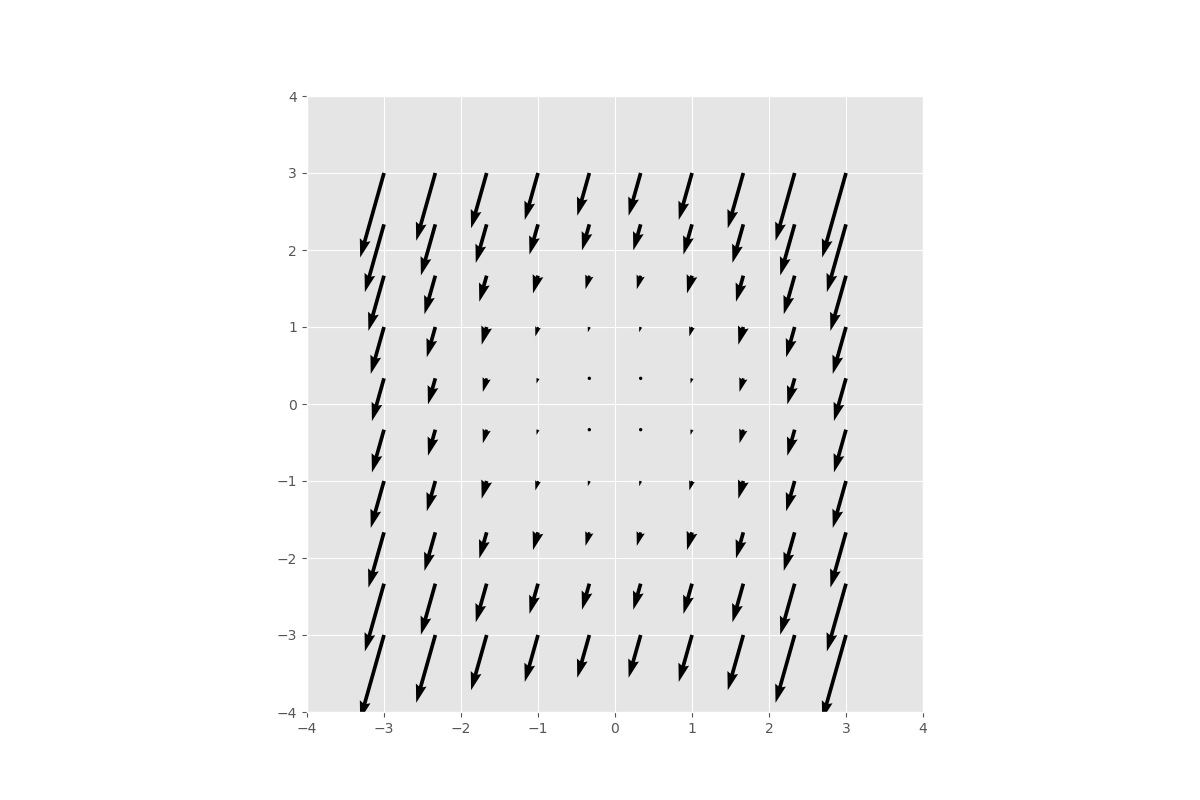

In [8]:
# Figura y ejes. 
fig1, ax = plt.subplots(figsize=(12,8))

ax.set_aspect('equal')
 
ax.set(xlim=(-4, 4), ylim=(-4, 4))

 
qax = ax.quiver(x_q, y_q, U[..., 0], V[..., 0],
                scale=100)
 
def animate(i):
  qax.set_UVC(U[..., i], V[..., i])

anim = animation.FuncAnimation(fig1, animate, interval=100, frames=len(t)-1, repeat=True)

# anim.save('quiver.gif', writer='imagemagick')
anim.save('quiver.mp4')
plt.show()

In [9]:
T3.max(axis=2)[..., np.newaxis].shape

(91, 91, 1)

In [10]:
T3.max(axis=2).shape

(91, 91)

In [11]:
sinT3.shape

(91, 91, 30)